# Chapter 8. Gradient Descent

In [33]:
from __future__ import division
from collections import Counter
from functools import partial
import math, random
import matplotlib.pyplot as plt

def vector_subtract(v, w):
    """ subtracts corresponding elements """
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def scalar_multiply(c, v):
    """ c is a number, v is a vector """
    return [c * v_i for v_i in v]

def distance(v, w):
    return magnitude(vector_subtract(v, w))

## The Idea Behind [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

Suppose we have some function f that takes a sinput a vector of real numbers and outputs a single real number.

In [34]:
def sum_of_squares(v):
    """ computes the sum of squared elements in v """
    return sum(v_i ** 2 for v_i in v)

We will frequently need to maximize or minimize such functions.  
That is, we need to find the input v that produces the largest or smallest possible value.  
For functions like ours, the [gradient](https://en.wikipedia.org/wiki/Gradient)(in calculus, this is the vector of partial derivatives) gives the input direction in which the function most quickly increases.  
Accordingly, one approach to maximizing a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (the direction that causes the function to increase the most), and repeat with a new starting point.  
Similarly, you can try to minimize a function by taking small steps in the *opposite* direction.

**Note**  
If a function has a unique global minimum, this procedure is likely to find it.  
If a function has multiple local minima, gradient descent might find the wrong one of them, in which case you might re-run the procedure from a variety of starting points.  
If a function has no minimum, then i't possible the procedure might go on forever.

## Estimating the Gradient

If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x.  
It is defined as the [limit](https://en.wikipedia.org/wiki/Limit_of_a_function) of the difference quotients:

In [35]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

as h approaches zero.

The derivative is the slope of the tangent line at <code>(x, f(x))</code>, while the difference quotient is the slope of the not-quite-tangent line that runs through <code>(x + h, f(x + h))</code>.  
As *h* gets smaller and smaller, the not-quite-tangent line gets closer to the tangent line.

For many functions, it is easy to calculate derivatives.

In [36]:
# For example, the square function:
def square(x):
    return x * x

# has the derivative: 
def derivative(x):
    return 2 * x

# which you can check by explicitly computing the difference quotient and taking the limit.

What if we couldn't (or didn't want to) find the gradient?  
Although we can't take limits in Python, we can estimate derivatives by evaluating the difference quotient for a very small <code>e</code>.

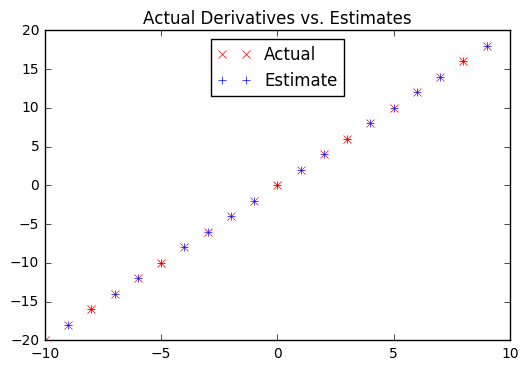

In [37]:
derivative_estimate = partial(difference_quotient, square, h=0.00001)

# plot to show that they are basically the same
x = range(-10,10)
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, map(derivative, x), 'rx', label='Actual')  # red x
plt.plot(x, map(derivative_estimate, x), 'b+', label='Estimate')  # blue +
plt.legend(loc=9)
plt.show()

When f is a function of many variables, it has multiple [partial derivatives](https://en.wikipedia.org/wiki/Partial_derivative), each indicating how f changes when we make small changes in just one of the input variables.  
We calculate its *i*th partial derivative by treating it as a function of just its *i*th variable, holding the other variables fixed:

In [38]:
def partial_difference_quotient(f, v, i, h):
    """ compute the ith partial difference quotient of f at v """
    # add h to only the ith element of v
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

after which we can estimate the gradient the same way:

In [39]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

**Note**  
A major drawback to this "estimate using difference quotients" approach is that it is computationally expensive.  
If <code>v</code> has length <code>n</code>, <code>estimate_gradient</code> has to evaluate <code>f</code> on 2<code>n</code> different inputs.  
If you are repeatedly estimating gradients, you are doing quite a bit of extra work.

## Using the Gradient

It's easy to see that the <code>sum_of_squares</code> function is smallest when its input <code>v</code> is a vector of zeroes, but imagine that we didn't know that.  
Let's use gradients to find the minimum among all three-dimensional vectors.  
We'll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [40]:
def step(v, direction, step_size):
    """ move step_size in the direction from v """
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    print v  # show all values on the way down 
    gradient = sum_of_squares_gradient(v)   # compute the gradient at v
    next_v = step(v, gradient, -0.01)       # take a negative gradient step
    if distance(next_v, v) < tolerance:     # stop if we're converging
        break
    v = next_v                              # continue if we're not
    
v

[-1, 6, 3]
[-0.98, 5.88, 2.94]
[-0.9604, 5.7623999999999995, 2.8811999999999998]
[-0.941192, 5.647151999999999, 2.8235759999999996]
[-0.92236816, 5.534208959999999, 2.7671044799999995]
[-0.9039207968, 5.423524780799999, 2.7117623903999997]
[-0.885842380864, 5.315054285183999, 2.6575271425919995]
[-0.86812553324672, 5.208753199480319, 2.6043765997401596]
[-0.8507630225817856, 5.104578135490713, 2.5522890677453565]
[-0.8337477621301499, 5.0024865727808985, 2.5012432863904492]
[-0.8170728068875469, 4.90243684132528, 2.45121842066264]
[-0.800731350749796, 4.804388104498774, 2.402194052249387]
[-0.7847167237348001, 4.708300342408799, 2.3541501712043993]
[-0.769022389260104, 4.614134335560623, 2.3070671677803114]
[-0.7536419414749019, 4.5218516488494105, 2.2609258244247052]
[-0.7385691026454039, 4.431414615872423, 2.2157073079362113]
[-0.7237977205924958, 4.342786323554974, 2.171393161777487]
[-0.7093217661806459, 4.255930597083875, 2.1279652985419375]
[-0.6951353308570329, 4.170811985142198

[-7.3625271458417e-07, 4.4175162875050205e-06, 2.2087581437525102e-06]

When this code is run, you can see that it always ends up with <code>v</code> that's very close to <code>[0,0,0]</code>.  
The smaller you make the <code>tolerance</code>, the closer you will get.

## Choosing the Right Step Size

Choosing the right step size is more art than science.  
Popular options include:
- Using a fixed step size  
- Gradually shrinking the step size over time  
- At each step, choose the step size that minimizes the value of the objective function  

The last one sound optimal but is, in practice, computationally expensive.  
We can approximate it by trying a variety of step sizes and choosing the one that results in the smallest value of the objective function:

In [41]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

It is possible that certain step sizes will result in invalid inputs for our function.  
Therefore, we need to create a "safe apply" function that returns infinity (which should never be the minimum of anything) for invalid inputs.

In [42]:
def safe(f):
    """ return a new function that is the same as f, except that it outputs infinity whenever f throws an error """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')  # "infinity" in Python
    return safe_f

## Putting It All Together